# Lettuce Classification Model
#### Developers: ANVI

### Import Libraries and Dependencies

In [1]:
# !pip install tensorflow
# import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
import io
import time

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom, CenterCrop, Rescaling, Resizing
from tensorflow.data import AUTOTUNE
from tensorflow import cast, int64

### Load Data

Setting Directory Paths Accordingly. 
  
 We split the training, validation, and test dataset.
    
    (1) Training Dataset is used to train the neural network directly. The dataset is partitioned by 8:2.
    (2) Validation Dataset is used during the training to assess the performance of the network at various iterations.
    (3) Test Dataset is either a partition of the dataset or the a new dataset entirely that evaluates the performance of our network after completion of the training phase.


In [38]:
path = os.path.abspath(os.getcwd())
test_path, train_path, og_path = path, path, path

path = path + '\\Data_Augmented'
validation_path = og_path + '\\Lettuce'
print('[INFO] Current Path:', og_path)
print('[INFO] Loading data path... ', path)

[INFO] Current Path: C:\Users\empil\Documents\python scripts\cs421
[INFO] Loading data path...  C:\Users\empil\Documents\python scripts\cs421\Data_Augmented


In [39]:
class_names = ['Bacterial', 'Fungal', 'No Disease Detected']

img_size = (227, 227)
size = 227
batch_size = 64
epochs = 30
seed = 42

As we use image_dataset_from_directory function that generates a dataset from the images in the given directory. We can set the image heights and widths to generally resize dimensions for all images to 227x227 pixels, which is part of image preprocessing.

In [40]:
print('Train Data')
train_data = image_dataset_from_directory(
    path,
    image_size = img_size,
    batch_size = batch_size,
    validation_split = 0.2,
    subset = 'training',
    shuffle = True,
    seed = seed,
)

print('\nValidation Data')
validation_data = image_dataset_from_directory(
    validation_path,
    image_size = img_size,
    batch_size = batch_size,
    validation_split = 0.2,
    subset = 'validation',
    shuffle = True,
    seed = seed,
)

print('\nTest Data')
test_data = image_dataset_from_directory(
    path,
    image_size = img_size,
    batch_size = batch_size,
    shuffle = True,
    seed = seed,
)

Train Data
Found 16087 files belonging to 3 classes.
Using 12870 files for training.

Validation Data
Found 967 files belonging to 3 classes.
Using 193 files for validation.

Test Data
Found 16087 files belonging to 3 classes.


### Hyper Parameters 

After numerous experimentations with various parameters, we use these as the optimal parameters preferable:
    
    batch_size = 64
    epochs = 30
    class_size = 3 
    
The primary preprocessing transformations that will be imposed on the data presented to the network are:
- normalizing and standardizing the images
- resizing all images that vary in dimensions to a 227x227 dimension. 

In [41]:
def plot_data(dataset):
    plt.figure(figsize = (20, 20))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]], fontsize = 20)
            plt.axis('off')

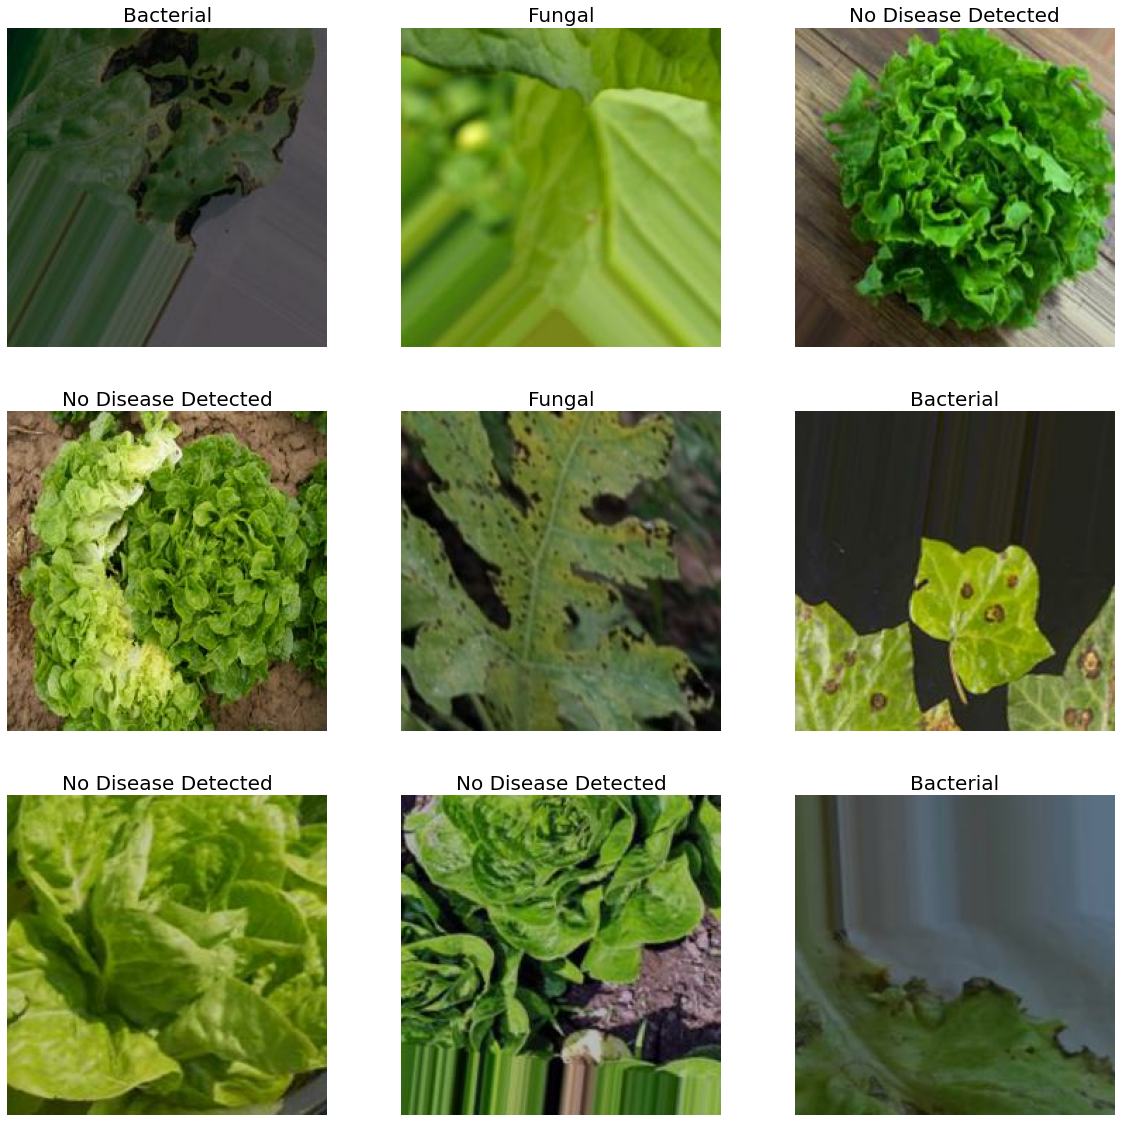

In [42]:
plot_data(train_data)

Subtle preprocessing using Keras

In [43]:
resize_and_rescale = Sequential([
    Resizing(size, size),
    Rescaling(1./255)
])

data_augmentation = Sequential([
  RandomFlip('horizontal_and_vertical'),
  RandomRotation(0.2),
])

In [51]:
model = Sequential()

model.add(resize_and_rescale)
model.add(data_augmentation)

# model.add(Rescaling(1./ 255))

model.add(Conv2D(96, 3, activation = 'relu', input_shape = (size, size, 3), strides = (4, 4)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(256, 3, activation = 'relu', strides = (1, 1), padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
# model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))
          
model.add(Conv2D(384, 3, activation = 'relu', strides = (1, 1), padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
# model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))

model.add(Conv2D(384, 3, activation = 'relu', strides = (1, 1), padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
# model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))

model.add(Conv2D(256, 3, activation = 'relu', strides = (1, 1), padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'sigmoid'))

In [52]:
model.compile(
    optimizer = 'sgd',
    loss = SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
start = time.time()
model.fit(
    train_data,
    validation_data = validation_data,
    epochs = 30,
    shuffle = True,
)
print('Time Lapsed:', str(round(time.time() - start, 4)))

Epoch 1/30
 57/202 [=======>......................] - ETA: 3:08 - loss: 1.4355 - accuracy: 0.4098

In [49]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 227, 227, 3)       0         
                                                                 
 sequential_11 (Sequential)  (None, 227, 227, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 225, 225, 32)      896       
                                                                 
 batch_normalization_24 (Bat  (None, 225, 225, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 112, 112, 64)    